In [83]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from statsmodels.robust.scale import huber
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
plt.style.use('seaborn')
%matplotlib inline

pd.set_option('display.max_rows', 0)
pd.set_option('display.max_columns', 0)



df_indicadores = pd.read_parquet(f'../data/processed/df_indicadores.parquet')

df_final_pob = pd.read_parquet('../data/processed/df_final_pob.parquet')


In [84]:
pd.set_option('display.max_rows', 0)

df_final_pob


,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,Abastecimiento domiciliario de agua potable,"Abastos, mercados, lonjas",Acceso a los núcleos de población,Actividades funerarias,Alcantarillado,Alumbrado público,Biblioteca pública,Cementerio,Comercio ambulante,Conservación y rehabilitación de la edificación,"Conservación, mantenimiento y vigilancia de los edificios de titularidad local destinados a centros públicos de educación infantil, de educación primaria o de educación especial",Cooperar con las Administraciones educativas correspondientes en la obtención de los solares necesarios para la construcción de nuevos centros docentes,Equipamientos culturales,Evacuación y tratamiento de aguas residuales,Evaluación e información de situaciones de necesidad social y la atención inmediata a personas en situación o riesgo de exclusión social,Ferias,Información y promoción de la actividad turística de interés y ámbito local,Infraestructura viaria y otros equipamientos de titularidad de la entidad local,Instalaciones de ocupación del tiempo libre,Instalaciones deportivas,Instalaciones deportivas de uso público,Limpieza viaria,Medio ambiente urbano,Medio ambiente urbano: Gestión de los residuos sólidos urbanos,Medio ambiente urbano: Parques y jardines públicos,"Medio ambiente urbano: Protección contra la contaminación acústica, lumínica y atmosférica en las zonas urbanas",Parque público,Participar en la vigilancia del cumplimiento de la escolaridad obligatoria,Pavimentación de las vías públicas,Policía local,Prevención y extinción de incendios,Promoción de la cultura,Promoción del deporte,Promoción en su término municipal de la participación de los ciudadanos en el uso eficiente y sostenible de las tecnologías de la información y las comunicaciones,Promoción y gestión de la vivienda de protección pública con criterios de sostenibilidad financiera,...,PC_Alcantarillado,PC_Alumbrado público,PC_Biblioteca pública,PC_Cementerio,PC_Comercio ambulante,PC_Conservación y rehabilitación de la edificación,"PC_Conservación, mantenimiento y vigilancia de los edificios de titularidad local destinados a centros públicos de educación infantil, de educación primaria o de educación especial",PC_Cooperar con las Administraciones educativas correspondientes en la obtención de los solares necesarios para la construcción de nuevos centros docentes,PC_Equipamientos culturales,PC_Evacuación y tratamiento de aguas residuales,PC_Evaluación e información de situaciones de necesidad social y la atención inmediata a personas en situación o riesgo de exclusión social,PC_Ferias,PC_Información y promoción de la actividad turística de interés y ámbito local,PC_Infraestructura viaria y otros equipamientos de titularidad de la entidad local,PC_Instalaciones de ocupación del tiempo libre,PC_Instalaciones deportivas,PC_Instalaciones deportivas de uso público,PC_Limpieza viaria,PC_Medio ambiente urbano,PC_Medio ambiente urbano: Gestión de los residuos sólidos urbanos,PC_Medio ambiente urbano: Parques y jardines públicos,"PC_Medio ambiente urbano: Protección contra la contaminación acústica, lumínica y atmosférica en las zonas urbanas",PC_Parque público,PC_Participar en la vigilancia del cumplimiento de la escolaridad obligatoria,PC_Pavimentación de las vías públicas,PC_Policía local,PC_Prevención y extinción de incendios,PC_Promoción de la cultura,PC_Promoción del deporte,PC_Promoción en su término municipal de la participación de los ciudadanos en el uso eficiente y sostenible de las tecnologías de la información y las comunicaciones,PC_Promoción y gestión de la vivienda de protección pública con criterios de sostenibilidad financiera,PC_Protección civil,PC_Protección de la salubridad pública,PC_Protección y gestión del Patrimonio histórico,PC_Recogida de residuos,PC_Transporte colectivo urbano de viajeros,PC_Tratamiento de residuos,"PC_Tráfico, estacionamiento de vehículos y movilidad","PC_Urbanismo: planeamiento, gestión, ejecución y disci

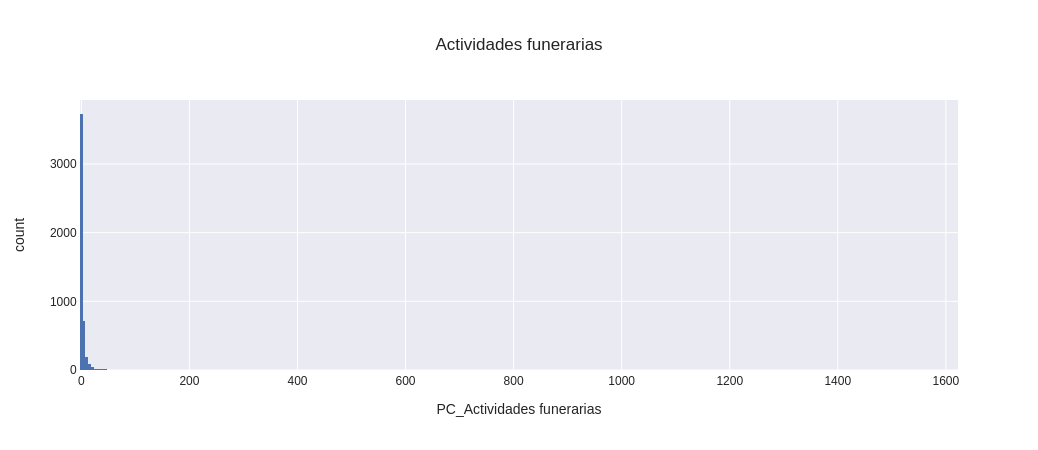

In [85]:
OB=df_final_pob.columns[8]

fig=px.histogram(df_final_pob, x=f'PC_{OB}',nbins=400,template='seaborn',title=f'{OB}',barmode='group')
fig.show()

In [86]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 0)



yea=df_final_pob[['CCAA', 'Provincia','Nombre Ente Principal','Código Ente Principal','Población 2018',
              'TOTAL', 'PC_TOTAL',OB,f'PC_{OB}']].sort_values(by=f'PC_{OB}', ascending=False).head(10).T
yea

,3028,1118,4606,999,2118,5012,1090,181,2529,2852
CCAA,Castilla-La Mancha,Aragón,La Rioja,Aragón,Castilla y León,Comunitat Valenciana,Aragón,Andalucía,Castilla y León,Castilla-La Mancha
Provincia,Toledo,Zaragoza,"Rioja, La",Zaragoza,Palencia,Valencia / València,Zaragoza,Córdoba,Valladolid,Cuenca
Nombre Ente Principal,Yuncler,Torrellas,Huércanos,Cubel,Castrillo de Onielo,Estubeny,Puendeluna,Palma del Río,Almenara de Adaja,Hontecillas
Código Ente Principal,08-45-203-AA-000,02-50-261-AA-000,16-26-079-AA-000,02-50-090-AA-000,07-34-051-AA-000,17-46-121-AA-000,02-50-220-AA-000,01-14-049-AA-000,07-47-008-AA-000,08-16-104-AA-000
Población 2018,3759,250,818,168,101,122,44,21159,21,53
TOTAL,7.73088e+06,388849,1.09362e+06,172194,35405.6,194343,51812.6,1.60668e+07,45404.6,106952
PC_TOTAL,2056.63,1555.4,1336.94,1024.96,350.55,1592.97,1177.56,759.334,2162.12,2017.96
Actividades funerarias,6.09431e+06,122493,365820,72338.1,23948.5,27672.3,9500.93,4.50748e+06,4174.5,9228.02
PC_Actividades funerarias,1621.26,489.971,447.213,430.584,237.114,226.822,215.93,213.029,198.786,174.114


In [87]:


# pd.set_option('display.max_columns', None)

# df_final_pob.loc[(df_final_pob['Población 2018']>11000)&(df_final_pob['Población 2018']<11200)]

In [88]:
df_indicadores.loc[(df_indicadores['Código Ente Principal']==yea.iloc[3,0])&(df_indicadores['Descripción']==OB)]

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades
14346,Toledo,08-45-203-AA-000,Ayuntamiento,Yuncler,Actividades funerarias,Nº efectivos en plantilla asignados al servicio,0.0
14347,Toledo,08-45-203-AA-000,Ayuntamiento,Yuncler,Actividades funerarias,Nº vehículos adscritos al servicio,0.0


# MELT

In [89]:
df_final_pob_melt=pd.melt(df_final_pob, id_vars=df_final_pob.columns[0:5],value_vars=df_final_pob.columns[5:48],
        var_name='Descripción',value_name='coste_efectivo')


df_final_pob_melt.to_parquet('../data/processed/df_final_pob_melt.parquet')

df_final_pob_melt['coste_efectivo'].sum()



28641291941.31

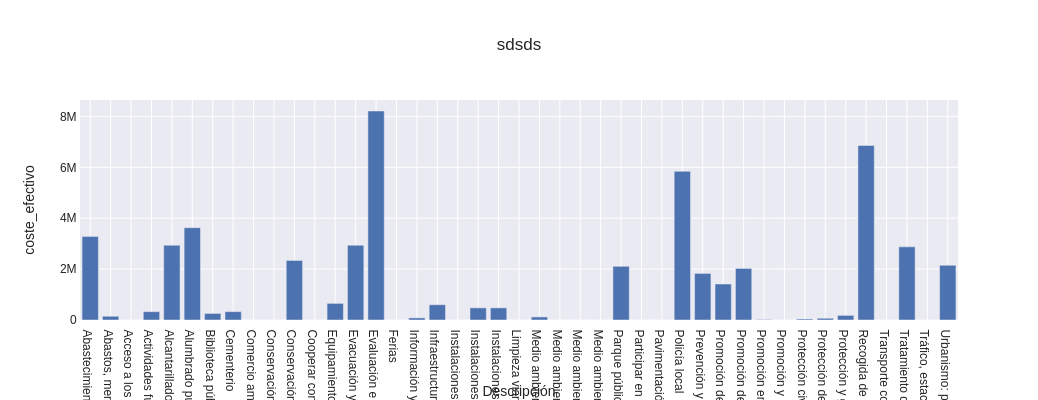

In [90]:
graph=df_final_pob_melt.loc[(df_final_pob_melt['Nombre Ente Principal']=='Lugo')]


fig=px.bar(graph,x='Descripción', y='coste_efectivo',template='seaborn',title='sdsds',barmode='stack', orientation='v')
fig.update_layout(height=400, width=1200)
fig.show()

/home/carpiero/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



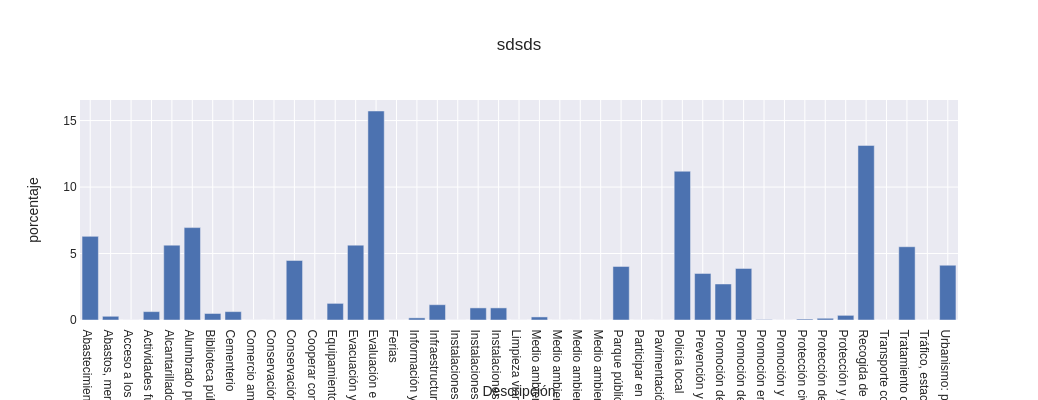

In [91]:
def porcentaje(df):
    df['porcentaje']=df.apply(lambda new: round(new['coste_efectivo']/df['coste_efectivo'].sum()*100,2), axis=1)
    return df

graph_porc=porcentaje(graph)


fig=px.bar(graph_porc,x='Descripción', y='porcentaje',template='seaborn',title='sdsds',barmode='stack', orientation='v')
fig.update_layout(height=400, width=1200)
fig.show()

In [92]:
df_indicadores.loc[(df_indicadores['Nombre Ente Principal']=='Lugo')&(df_indicadores['Descripción']=='Policía local')]

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades
5472,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº efectivos asignados al servicio,117.0
5473,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº vehículos adscritos al servicio,25.0
5514,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº efectivos asignados al servicio,0.0
5515,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº vehículos adscritos al servicio,0.0


# MEAN

In [93]:
df_final_pob.describe().T[]

SyntaxError: invalid syntax (<ipython-input-93-b8d74cf4cbae>, line 1)

In [94]:
columns_total=df_final_pob.columns[5:48].to_list()+df_final_pob.columns[50:51].to_list()

print(len(columns_total))

columns_pc=df_final_pob.columns[51:].to_list()
print(len(columns_pc))


44
44


In [95]:
rs = RobustScaler()
# X = pd.DataFrame(rs.fit_transform(X), columns= X.columns)
rs.fit(df_final_pob[columns_pc])

rs.center_


array([3.97074060e+01, 0.00000000e+00, 3.07692308e-03, 2.05338809e-03,
       3.07793123e+00, 4.23548893e+01, 0.00000000e+00, 1.83266936e+00,
       0.00000000e+00, 0.00000000e+00, 8.62068966e-01, 0.00000000e+00,
       0.00000000e+00, 3.22580645e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.13496933e+00, 1.33668531e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.71146251e+00, 0.00000000e+00,
       1.70345522e+01, 0.00000000e+00, 0.00000000e+00, 6.45090361e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.53261795e+00, 4.77853185e+02])

In [96]:
df_final_pob.describe().T['mean'].to_list()

[354777.25101047446,
 33926.29011501335,
 37771.04979256521,
 26235.939190798934,
 101223.89267200656,
 236204.86203532552,
 62466.94863627029,
 37982.991489012114,
 2916.2371493119736,
 39623.87046621483,
 227931.67427397822,
 13763.580833846785,
 72247.9864243171,
 80167.32603409325,
 670175.2627808584,
 16651.106611213803,
 53235.42897104128,
 79574.81684534812,
 44695.855436434584,
 94308.8426370918,
 249114.1546149107,
 394984.0092483056,
 23407.371825836926,
 33301.493499691926,
 97041.9496878209,
 12485.767286917231,
 205142.67906346274,
 11425.990825631547,
 227932.20094886015,
 621589.239502978,
 117144.63383240912,
 183082.2330149928,
 121339.45160813308,
 31549.076705689058,
 49821.18379544054,
 29847.317406038204,
 44512.11248716369,
 19318.88000821524,
 344085.1915896488,
 316856.1992154447,
 102778.63538919696,
 133638.1079995892,
 226097.5637050729,
 8087.2483056069,
 5882376.656666666,
 66.4742401756412,
 0.8827538328700139,
 14.906496911589368,
 3.562335291032662,
 11.

In [106]:
df=df_final_pob_melt

well_statuses=['Aragón','Andalucía','La Rioja']
well_types=['Zaragoza','Córdoba']
municipio_types=['Torrellas','Palma del Río']
partida_de_coste_types=['Actividades funerarias','Biblioteca pública']

df[df["CCAA"].isin(well_statuses)
        & df['Provincia'].isin(well_types)
        & df['Nombre Ente Principal'].isin(municipio_types)
        & df['Descripción'].isin(partida_de_coste_types)]

,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,Descripción,coste_efectivo
14782,Andalucía,Córdoba,Ayuntamiento,Palma del Río,01-14-049-AA-000,Actividades funerarias,4507477.74
15693,Aragón,Zaragoza,Ayuntamiento,Torrellas,02-50-261-AA-000,Actividades funerarias,122492.81
29389,Andalucía,Córdoba,Ayuntamiento,Palma del Río,01-14-049-AA-000,Biblioteca pública,113611.81
30300,Aragón,Zaragoza,Ayuntamiento,Torrellas,02-50-261-AA-000,Biblioteca pública,0.00


In [108]:

dff=df[df["CCAA"].isin(well_statuses)
        & df['Provincia'].isin(well_types)
        & df['Nombre Ente Principal'].isin(municipio_types)
        & df['Descripción'].isin(partida_de_coste_types)]


dff["coste_efectivo"].values

array([4507477.74,  122492.81,  113611.81,       0.  ])

In [121]:
CCAA=df_final_pob['CCAA'].unique().to_list()

WELL_STATUSES = dict(zip(CCAA, CCAA))
WELL_STATUSES

{'Andalucía': 'Andalucía',
 'Aragón': 'Aragón',
 'Principado de Asturias': 'Principado de Asturias',
 'Illes Balears': 'Illes Balears',
 'Canarias': 'Canarias',
 'Cantabria': 'Cantabria',
 'Castilla y León': 'Castilla y León',
 'Castilla-La Mancha': 'Castilla-La Mancha',
 'Cataluña': 'Cataluña',
 'Extremadura': 'Extremadura',
 'Galicia': 'Galicia',
 'Comunidad de Madrid': 'Comunidad de Madrid',
 'Región de Murcia': 'Región de Murcia',
 'La Rioja': 'La Rioja',
 'Comunitat Valenciana': 'Comunitat Valenciana'}

In [122]:
well_status_options = [
    {"label": WELL_STATUSES[well_status], "value": well_status}
    for well_status in WELL_STATUSES
]

In [123]:
well_status_options

[{'label': 'Andalucía', 'value': 'Andalucía'},
 {'label': 'Aragón', 'value': 'Aragón'},
 {'label': 'Principado de Asturias', 'value': 'Principado de Asturias'},
 {'label': 'Illes Balears', 'value': 'Illes Balears'},
 {'label': 'Canarias', 'value': 'Canarias'},
 {'label': 'Cantabria', 'value': 'Cantabria'},
 {'label': 'Castilla y León', 'value': 'Castilla y León'},
 {'label': 'Castilla-La Mancha', 'value': 'Castilla-La Mancha'},
 {'label': 'Cataluña', 'value': 'Cataluña'},
 {'label': 'Extremadura', 'value': 'Extremadura'},
 {'label': 'Galicia', 'value': 'Galicia'},
 {'label': 'Comunidad de Madrid', 'value': 'Comunidad de Madrid'},
 {'label': 'Región de Murcia', 'value': 'Región de Murcia'},
 {'label': 'La Rioja', 'value': 'La Rioja'},
 {'label': 'Comunitat Valenciana', 'value': 'Comunitat Valenciana'}]

In [132]:
list(WELL_STATUSES.keys())[0]

'Andalucía'

In [133]:
WELL_STATUSES

{'Andalucía': 'Andalucía',
 'Aragón': 'Aragón',
 'Principado de Asturias': 'Principado de Asturias',
 'Illes Balears': 'Illes Balears',
 'Canarias': 'Canarias',
 'Cantabria': 'Cantabria',
 'Castilla y León': 'Castilla y León',
 'Castilla-La Mancha': 'Castilla-La Mancha',
 'Cataluña': 'Cataluña',
 'Extremadura': 'Extremadura',
 'Galicia': 'Galicia',
 'Comunidad de Madrid': 'Comunidad de Madrid',
 'Región de Murcia': 'Región de Murcia',
 'La Rioja': 'La Rioja',
 'Comunitat Valenciana': 'Comunitat Valenciana'}